In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0 , 12  , 100)
y = np.sin(0.5*x)

xx = np.linspace(0 , 12 , 13 )
yy = np.sin(0.5*xx)

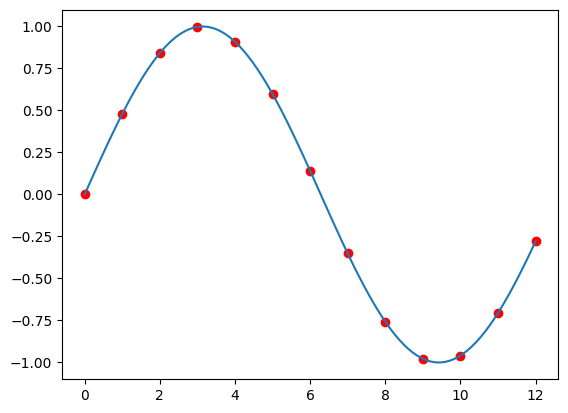

In [ ]:
plt.plot(x , y)
plt.scatter(xx , yy , c='r')


Kernel interpolation:
$$ f(x) \approx \sum_{i=1}^{N} c_i \phi_i(x) $$
$$ \phi_i(x) = \exp(-\epsilon   (x-c_i)^2\big)$$

In [ ]:
def gaussian(x , c , esp=1):
  return np.exp(-eps*(x -c)**2)

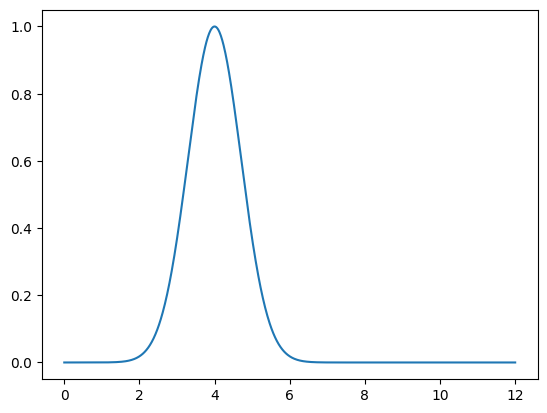

In [ ]:
x = np.linspace(0 , 12 , 1000)
c =4
eps = 1

plt.plot(x , gaussian(x , c , eps));

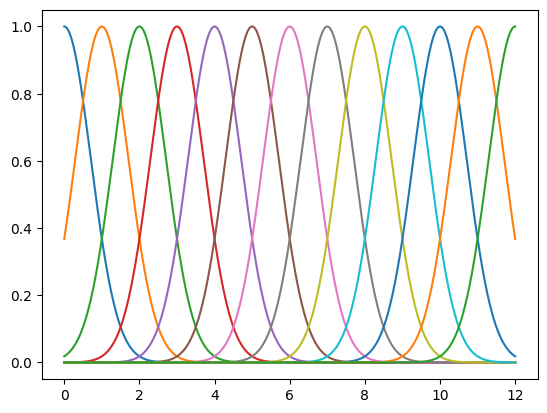

In [ ]:
for i in range(13):
  plt.plot(x , gaussian(x , i , eps));

$$\phi(x) c = y $$

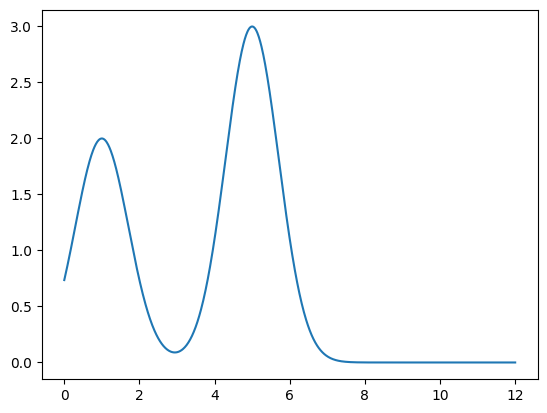

In [ ]:
eps = 1
plt.plot(x , 2*gaussian(x , 1)   +    3*gaussian(x , 5 ));

In [ ]:
Phi = np.zeros((13 , 13))

In [ ]:
center  = [i  for i in range(13)]
center

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
eps = 1
for i in range(13):
  for  j in range(13):
        Phi[i , j] = gaussian(xx[i] , center[j] , eps)

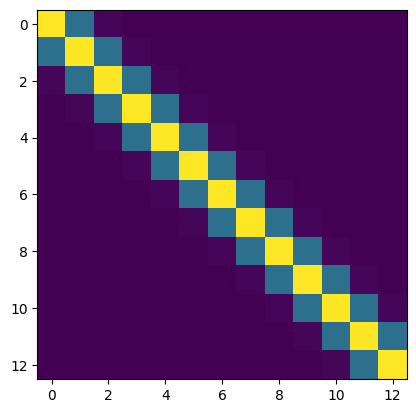

In [ ]:
plt.imshow(Phi)

In [ ]:
np.linalg.inv(Phi) @ yy

array([-0.1334602 ,  0.33835303,  0.48659302,  0.60577183,  0.54345829,
        0.36020377,  0.08455353, -0.21093728, -0.45323543, -0.59020348,
       -0.5668239 , -0.44781101, -0.1042204 ])

In [ ]:
eps = 1
f  = 0

for i in range(13):
        f +=  center[i]   *    gaussian(x , center[i] , eps)

In [ ]:
x = np.linspace(0 , 12  , 100)
y = np.sin(0.5*x)

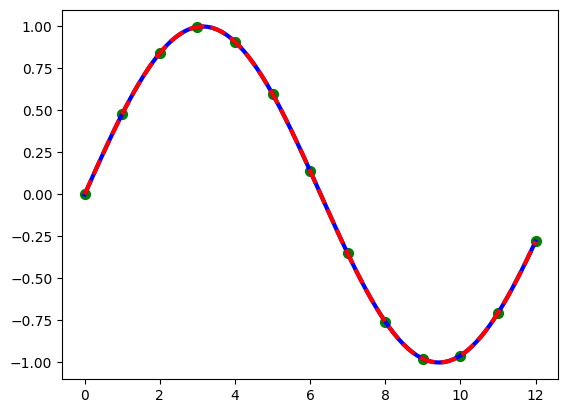

In [ ]:
plt.plot(x , y, c = 'blue' , linewidth = 3)
plt.plot(x , y , '--' ,  c = 'red', linewidth = 3)
plt.scatter(xx , yy  , c ='green' , s =50 )

Kernel Regretion

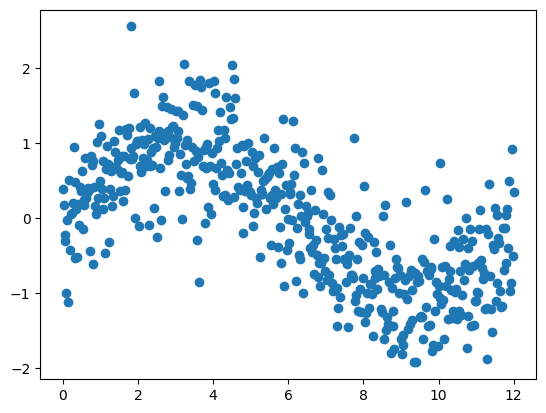

In [ ]:
x = np.linspace(0,12,500)
y = np.sin(0.5*x) + np.random.normal(0 , 0.5 , x.shape)

plt.scatter(x , y)

In [ ]:
eps = 1
def gaussian(x , c , eps ):
  return np.exp(-eps*(x-c)**2)

In [ ]:
centers = np.linspace( 0  , 12 ,15)

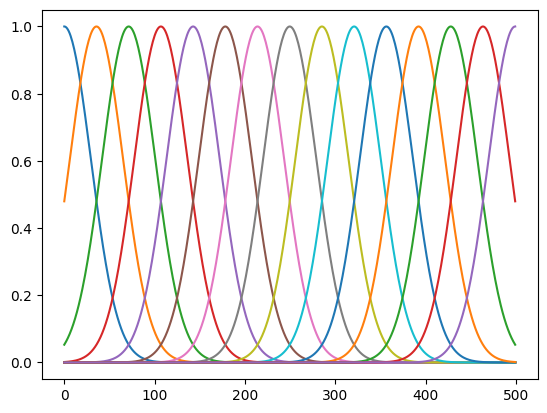

In [ ]:
for c in centers:
  plt.plot(gaussian(x , c , eps) ,
                    label = 'Center ={}'.format(str(c)))

In [ ]:
Phi = np.zeros((x.shape[0] , len(centers)))

In [ ]:
Phi.shape

(500, 15)

In [ ]:
from random import gauss
for i in range(Phi.shape[0]):
  for j in range(Phi.shape[1]):
    Phi[i,j] = gaussian(x[i] , centers[j] , eps)

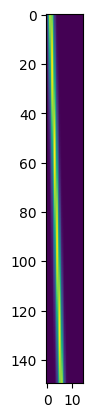

In [ ]:
plt.imshow(Phi[50 :200 , :])

$$\Phi  c = y$$
$$\Phi^T\Phi c = \Phi^T   y$$
$$ c = (\Phi^T\Phi)^{-1}\Phi^T   y$$

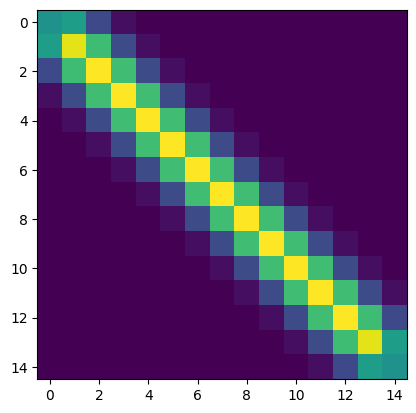

In [ ]:
plt.imshow(Phi.T  @  Phi)

In [ ]:
c = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

In [ ]:
c

array([-0.38792542,  0.48177469,  0.17044037,  0.7665244 ,  0.12441415,
        0.86994575, -0.1481726 ,  0.4156744 , -0.36491726, -0.2434292 ,
       -0.41002174, -0.83275302, -0.0050261 , -0.84306422,  0.23663352])

In [ ]:
f = 0

for i in range(len(centers)):
  f += c[i]* gaussian(x , centers[i] , eps = eps)

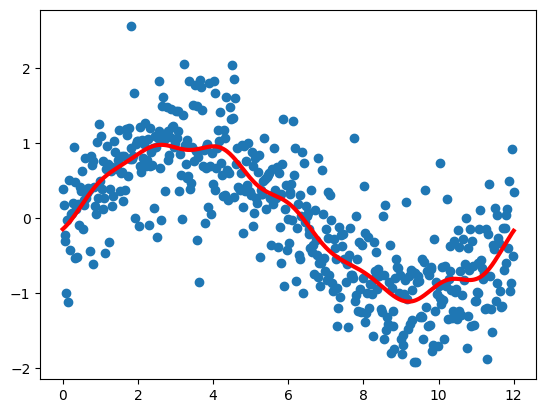

In [ ]:
plt.scatter(x , y )
plt.plot(x , f , c='r' , linewidth = 3)

In [ ]:
np.sum( (f-y)**2) / f.shape[0]

0.2586351135434598